In [1]:
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-08-25 08:42:46.789524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-25 08:42:46.789567: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_5clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_20clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_2clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_5clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_20clusters.csv
2400


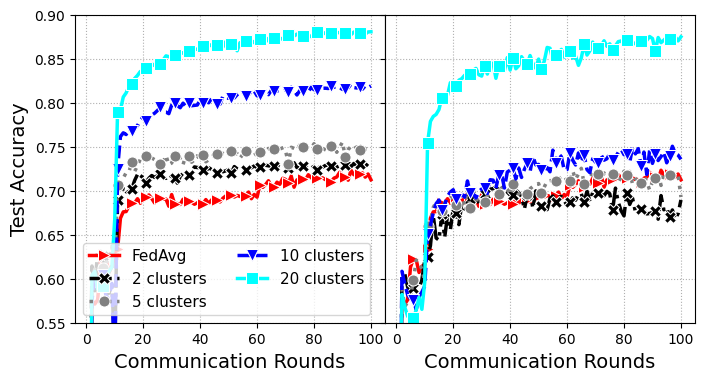

In [28]:
#comparando o numero de clusters

metric = 'CKA'
selection = 'All'
method = 'HC'

files = {'FedAvg':f'simulation1/local_logs/MotionSense/{metric}-(-1)-HC-{selection}-0.5/evaluate/acc_24clients_1clusters.csv',
         '2 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_2clusters.csv',
         '5 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_5clusters.csv' ,
         '10 clusters': f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_10clusters.csv',
         '20 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_20clusters.csv'}

solucoes = ['FedAvg','2 clusters', '5 clusters' , '10 clusters' ,'20 clusters']
colors =  {'FedAvg':'r', '2 clusters'   :'k', '5 clusters':'gray' , '10 clusters':'blue' ,'20 clusters':'cyan'}
styles =  {'FedAvg':'-', '2 clusters'   :'-.', '5 clusters':':' , '10 clusters':'--' ,'20 clusters':'-'}
markers = {'FedAvg':'>', '2 clusters'   :'X', '5 clusters':'o' , '10 clusters':'v' ,'20 clusters':'s'}

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (8,4))

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax1, legend='brief', label=sol,)


metric = 'CKA'
selection = 'All'
method = 'Random'

files = {'FedAvg':f'simulation1/local_logs/MotionSense/{metric}-(-1)-HC-{selection}-0.5/evaluate/acc_24clients_1clusters.csv',
         '2 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_2clusters.csv',
         '5 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_5clusters.csv' ,
         '10 clusters': f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_10clusters.csv',
         '20 clusters':f'simulation1/local_logs/MotionSense/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_20clusters.csv'}

solucoes = ['FedAvg','2 clusters', '5 clusters' , '10 clusters' ,'20 clusters']
colors =  {'FedAvg':'r', '2 clusters'   :'k', '5 clusters':'gray' , '10 clusters':'blue' ,'20 clusters':'cyan'}
styles =  {'FedAvg':'-', '2 clusters'   :'-.', '5 clusters':':' , '10 clusters':'--' ,'20 clusters':'-'}
markers = {'FedAvg':'>', '2 clusters'   :'X', '5 clusters':'o' , '10 clusters':'v' ,'20 clusters':'s'}


for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8, ax = ax2)
    

ax1.set_ylim(0.55, 0.9)
ax1.grid(True, linestyle = ':')
ax2.set_ylim(0.55, 0.9)
ax1.legend(ncol = 2, fontsize=11)
ax2.grid(True, linestyle = ':')

ax1.set_xlabel('Communication Rounds', size = 14)
ax1.set_ylabel('Test Accuracy', size  = 14)
#ax1.set_xticks(size = 16)
#ax1.set_yticks(size = 16)


ax2.set_xlabel('Communication Rounds', size = 14)
ax2.set_ylabel('Test Accuracy', size  = 14)
#ax2.set_xticks(size = 16)
#ax2.set_yticks(size = 16)


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(f'figures/n_clusters_comp_{method}.pdf', dpi = 600, bbox_inches='tight')
plt.show()



In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-All-0.5/evaluate/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/evaluate/acc_24clients_10clusters.csv
2400


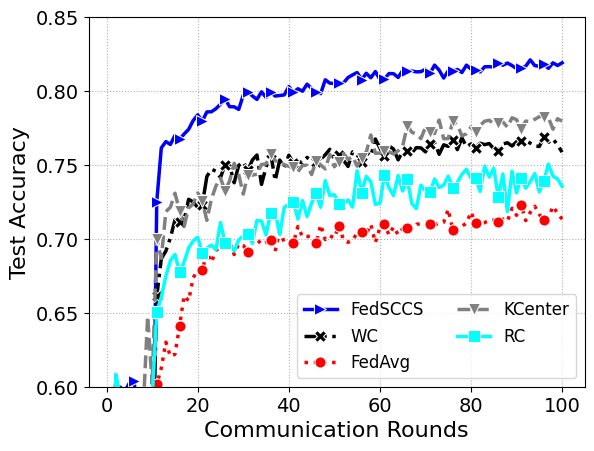

In [9]:
#comparando as soluções

n_clusters = 10
selection = 'All'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
colors =  {'FedSCCS':'blue', 'WC'   :'k', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'cyan'}
styles =  {'FedSCCS':'-', 'WC'   :'-.',   'FedAvg':':' ,    'KCenter':'--' ,  'RC':'-'}
markers = {'FedSCCS':'>', 'WC'   :'X',    'FedAvg':'o' ,    'KCenter':'v' ,   'RC':'s'}

for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds', legend='brief', label=sol,
                  linewidth = 2.5, color = colors[sol], linestyle = styles[sol], marker=markers[sol], markevery = 5, markersize = 8)

plt.ylim(0.6, 0.85)
plt.legend(ncol = 2, fontsize=12)
plt.grid(True, linestyle = ':')
plt.xlabel('Communication Rounds', size = 16)
plt.ylabel('Test Accuracy', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig(f'figures/solutions_{selection}_CL.pdf', dpi = 600)
plt.show()


In [27]:
n_clusters = 10
selection = 'All'
method = 'HC'
model_size = 47192

cost =  {'FedSCCS':[], 'WC'   :[], 'FedAvg':[] , 'KCenter':[] ,'RC':[]}
for selection in ['All', 'POC', 'Random']:
    files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
            'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
            'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv',
            'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
            'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv'}

    solucoes = ['FedSCCS', 'WC', 'FedAvg' , 'KCenter' ,'RC']
    colors =  {'FedSCCS':'blue', 'WC'   :'gold', 'FedAvg':'r' , 'KCenter':'gray' ,'RC':'lime'}

    for sol in solucoes:
        print(files[sol])
        acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
        print(len(acc))


        c = acc.groupby('rounds').count()['client'].sum() * model_size / 10e6
        cost[sol].append(c)


simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/train/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-All-0.5/train/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-Random-All-0.5/train/acc_24clients_10clusters.csv
2400
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1500
simulation1/local_logs/MotionSense/weights-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1590
simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/train/acc_24clients_1clusters.csv
2400
simulation1/local_logs/MotionSense/weights-(-1)-KCenter-POC-0.5/train/acc_24clients_10clusters.csv
1590
simulation1/local_logs/MotionSense/CKA-(-1)-Random-POC-0.5/train/acc_24clients_10clusters.csv
1230
simulation

In [30]:
cost = pd.DataFrame(cost).set_index([['All', 'POC', 'Random']])
cost

,FedSCCS,WC,FedAvg,KCenter,RC
All,11.326080,11.326080,11.32608,11.326080,11.326080
POC,7.078800,7.503528,11.32608,7.503528,5.804616
Random,5.379888,5.379888,11.32608,5.375169,5.379888


In [31]:
cost['FedSCCS'] / cost['FedSCCS'][0]

All       1.000
POC       0.625
Random    0.475
Name: FedSCCS, dtype: float64

simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1500
0.02921344435116884


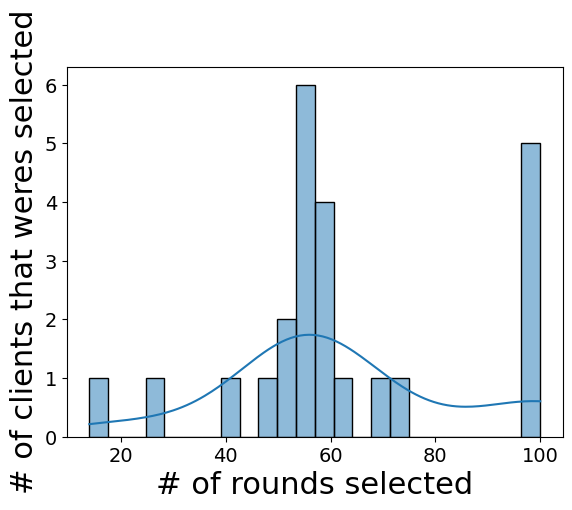

In [104]:
n_clusters = 10
selection = 'POC'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc))

print(np.std(acc[acc['rounds'] == 100]['acc']))
sns.histplot(acc.groupby('client').count()['rounds'], bins=24, kde = True)
plt.xlabel('# of rounds selected', size = 22)
plt.ylabel('# of clients that weres selected', size = 22)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig('figures/rounds_client_POC.pdf', dpi = 600)



simulation1/local_logs/MotionSense/CKA-(-1)-HC-Random-0.5/train/acc_24clients_10clusters.csv
1140
0.030790556880479835


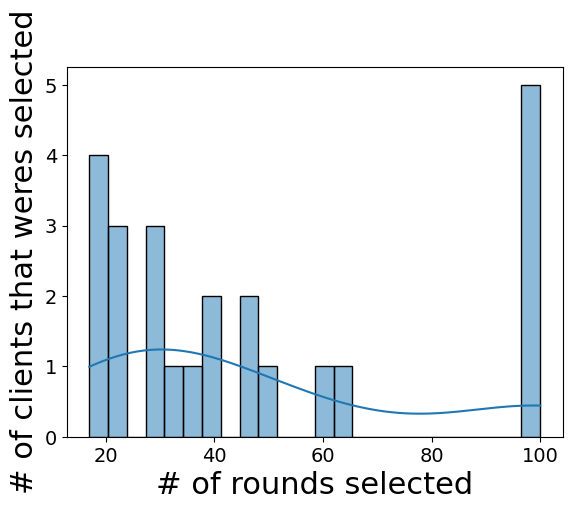

In [105]:
n_clusters = 10
selection = 'Random'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc))

print(np.std(acc[acc['rounds'] == 100]['acc']))
sns.histplot(acc.groupby('client').count()['rounds'], bins=24, kde = True)
plt.xlabel('# of rounds selected', size = 22)
plt.ylabel('# of clients that weres selected', size = 22)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.savefig('figures/rounds_client_Random.pdf', dpi = 600)


simulation1/local_logs/MotionSense/CKA-(-1)-HC-Random-0.5/train/acc_24clients_10clusters.csv
1140
simulation1/local_logs/MotionSense/CKA-(-1)-HC-POC-0.5/train/acc_24clients_10clusters.csv
1500
0.02921344435116884


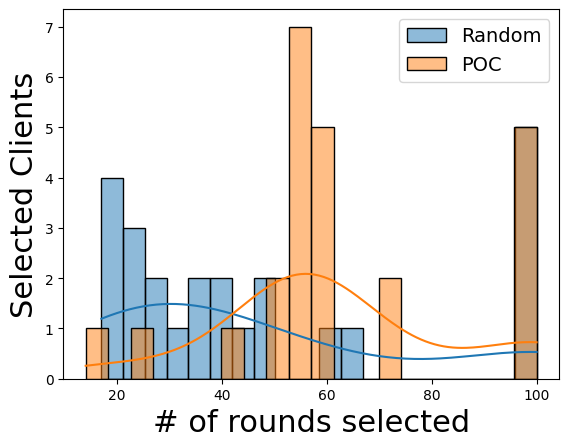

In [144]:
n_clusters = 10
selection = 'Random'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc2 =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc2))

#print(np.std(acc2[acc2['rounds'] == 100]['acc']))
sns.histplot(acc2.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.5, label = 'Random')
#plt.hist(acc2.groupby('client').count()['rounds'], bins = 20, alpha = 0.4, label= 'Random')
plt.xlabel('# of rounds selected', size = 22)
plt.ylabel('# of clients that were selected', size = 22)
plt.xticks(size = 14)
plt.yticks(size = 14)
#plt.savefig('figures/rounds_client_POC.pdf', dpi = 600)


n_clusters = 10
selection = 'POC'
method = 'HC'


files = {'FedSCCS':f'simulation1/local_logs/MotionSense/CKA-(-1)-{method}-{selection}-0.5/train/acc_24clients_{n_clusters}clusters.csv',
         'WC':f'simulation1/local_logs/MotionSense/weights-(-1)-{method}-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'FedAvg':f'simulation1/local_logs/MotionSense/weights-(-1)-HC-All-0.5/evaluate/acc_24clients_1clusters.csv',
         'KCenter':f'simulation1/local_logs/MotionSense/weights-(-1)-KCenter-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv',
         'RC':f'simulation1/local_logs/MotionSense/CKA-(-1)-Random-{selection}-0.5/evaluate/acc_24clients_{n_clusters}clusters.csv'}

sol = 'FedSCCS'
print(files[sol])
acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
print(len(acc))

print(np.std(acc[acc['rounds'] == 100]['acc']))
sns.histplot(acc.groupby('client').count()['rounds'], bins=20, kde = True, alpha = 0.5, label = 'POC')
#plt.hist(acc.groupby('client').count()['rounds'], bins = 20, alpha=0.4, label='POC')
plt.xlabel('Frequency', size = 22)
plt.ylabel('Selected Clients', size = 22)
plt.xticks(size = 10)
plt.yticks(size = 10)
#plt.savefig('figures/rounds_client_Random.pdf', dpi = 600)
plt.legend(  fontsize = 14)
plt.savefig('figures/rounds_client_Random_POC.pdf', dpi = 600)
plt.show()

In [98]:
metric = 'CKA'
selection = 'All'
method = 'HC'

files = {'FedAvg':      f'simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/clusters_24clients_1clusters.txt',
         '2 clusters':  f'simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/clusters_24clients_2clusters.txt',
         '5 clusters':  f'simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/clusters_24clients_5clusters.txt' ,
         '10 clusters': f'simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/clusters_24clients_10clusters.txt',
         '20 clusters': f'simulation1/local_logs/MotionSense/CKA-(-1)-HC-All-0.5/clusters_24clients_20clusters.txt'}

solucoes = ['FedAvg','2 clusters', '5 clusters' , '10 clusters' ,'20 clusters']


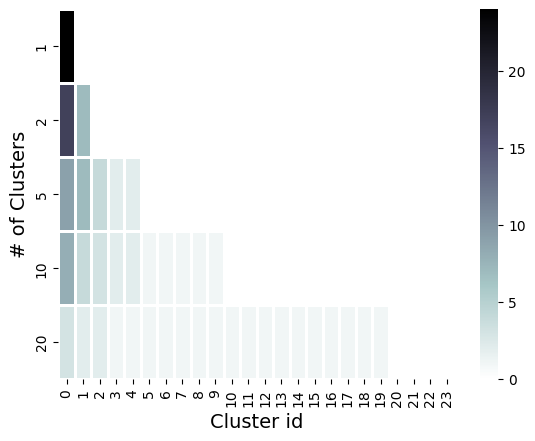

In [147]:
clusters = []

clusters_generated = {'FedAvg':    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    '2 clusters':  [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1 ,1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1],
                    '5 clusters':  [1, 1, 1, 3, 4, 1, 3, 2, 3, 1, 4, 1, 4 ,5, 1, 1, 3, 2, 5, 3, 3, 1, 3, 4],
                    '10 clusters': [7, 6, 9, 7, 2, 7, 8, 9, 8, 8, 1, 7, 1 ,4, 7, 3, 8, 10,5, 6, 7, 7, 7, 1],
                    '20 clusters': [15,14,16,11,4,13,9,17,7,8 ,3 ,7, 1 ,5 ,7 ,20 ,18,19, 6 ,10, 13 ,12 ,12 ,2]}

for s in clusters_generated.values():
    
    c = pd.Series([int(i) for i in s])
    l = list(c.value_counts())
    compl = 24 - len(l)
    zeros = list(np.zeros(compl))
    clusters.append(l+zeros)

sns.heatmap(clusters, cmap='bone_r', linewidths=1)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], [1,2, 5, 10, 20])
plt.ylabel('# of Clusters', size=14)
plt.xlabel('Cluster id', size=14)

plt.savefig('figures/clusters_FEDSCCS.pdf', dpi = 600, bbox_inches='tight')

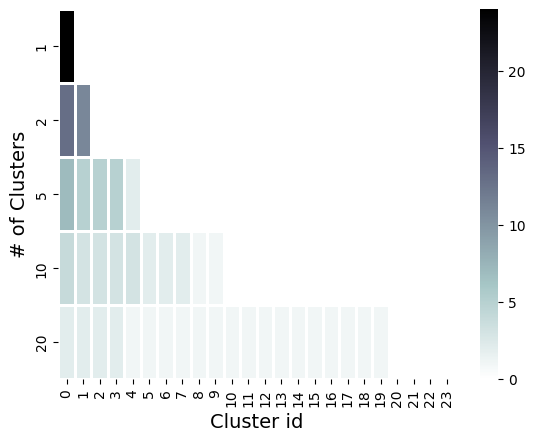

In [146]:
clusters = []

clusters_generated = {'FedAvg':    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    '2 clusters':  [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
                    '5 clusters':  [0, 2, 2, 1, 3, 1, 4, 0, 2, 0, 4, 1, 3, 0, 3, 2, 2, 1, 2, 3, 0, 2, 1, 3],
                    '10 clusters': [0, 3, 2, 5, 5, 8, 2, 7, 0, 4, 8, 7, 7, 3, 1, 6, 4, 4, 4, 3, 1, 8, 9, 0],
                    '20 clusters': [18, 17, 13, 1, 3, 5, 15, 13, 11, 8, 14, 2, 10, 16, 9, 0, 14, 7, 6, 5, 19, 10, 4, 12]}

for s in clusters_generated.values():
    
    c = pd.Series([int(i) for i in s])
    l = list(c.value_counts())
    compl = 24 - len(l)
    zeros = list(np.zeros(compl))
    clusters.append(l+zeros)

sns.heatmap(clusters, cmap='bone_r', linewidths=1)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], [1,2, 5, 10, 20])
plt.ylabel('# of Clusters', size=14)
plt.xlabel('Cluster id', size=14)

plt.savefig('figures/clusters_Random.pdf', dpi = 600, bbox_inches='tight')